In [89]:
import numpy as np
import scipy.stats as stats
#import arviz as az

In [90]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):

    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(1, grid_points)  

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()

    return p_grid, posterior

In [91]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)


#### 위 프로그램은 동전을 아홉번 던져 여섯번 성공(앞면이 나옴)한 실험에 관한  시뮬레이션 코드이다.

#### success 할 확률을 p라 할 때,  위 프로그램 코드의 samples 를 이용하여 다음 물음에 답하시오. 
단, 프로그램 코드가 없는 답은 0점 입니다.  
1 - 5번 문제는 각 6점이고, 6번 문제는 10점이다.
<br><br><br>

<br>
1. p= 0.2 이하인 사후확률은?

<br>
2. p= 0.8 이상인 사후확률은?

<br>
3. 사후확률의 20%는 어떤 p값 이하에 있는가?

<br>
4. 사후확률의 20%는 어떤 p값 이상에 있는가?

<br>
5. 80%의 사후 확률을 갖는 가장 좁은 구간은?

<br>
6. 구간 이하 확률과 구간 이상 확률이 같게 만드는 조건에서, 80%의 사후확률을 갖는 구간은?

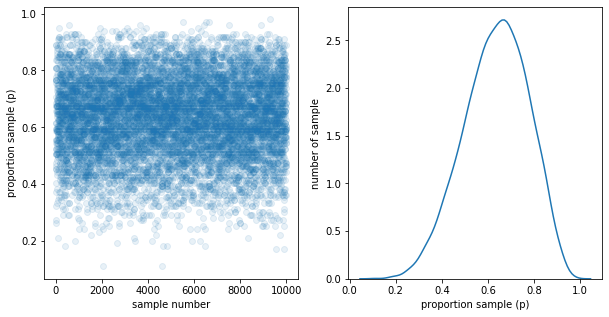

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

#graph
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
ax0.plot(samples, 'o', alpha=0.1)
ax0.set_xlabel('sample number', fontsize=10)
ax0.set_ylabel('proportion sample (p)', fontsize=10)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion sample (p)', fontsize=10)
ax1.set_ylabel('number of sample', fontsize=10);

In [100]:
#1
print("1번")
print("p <= 0.2 :", sum(posterior[p_grid<=0.2]))

1번
p <= 0.2 : 0.0007813151890352864


In [101]:
#2
print("2번")
print("p >= 0.8 :", sum(posterior[p_grid>=0.8]))

2번
p >= 0.8 : 0.11553983005329513


In [102]:
#3
print("3번")
print("사후확률 20% 하위 :", np.percentile(samples, 20))

3번
사후확률 20% 하위 : 0.5151515151515152


In [103]:
#4
print("4번")
print("사후확률 20% 상위 :", np.percentile(samples, 80))

4번
사후확률 20% 상위 : 0.7575757575757577


In [104]:
#5
print("5번")
sorted_samples = sorted(samples)
min_per, max_per = 0,100
for i in range(len(samples)-8000):
    temp_min, temp_max = sorted_samples[i], sorted_samples[i+8000]
    if temp_max-temp_min<max_per-min_per:
        min_per = temp_min
        max_per = temp_max
print("사후확률 80% 최소 범위 :", min_per, max_per)

5번
사후확률 80% 최소 범위 : 0.4747474747474748 0.8282828282828284


In [105]:
#6
print("6번")
print("구간 이하 확률과 구간 이상 확률이 같은 사후확률 80% 구간 :", sorted_samples[len(samples)-9001], sorted_samples[len(samples)-1001])
print("구간 이하 확률과 구간 이상 확률이 같은 사후확률 80% 구간 :", np.percentile(samples, [10,90]))

6번
구간 이하 확률과 구간 이상 확률이 같은 사후확률 80% 구간 : 0.4444444444444445 0.8181818181818182
구간 이하 확률과 구간 이상 확률이 같은 사후확률 80% 구간 : [0.44444444 0.81818182]


In [99]:
#appendix
print("Appendix")
print("중앙 :", np.median(samples))
print("평균 :", np.mean(samples))
print("분산 :", np.var(samples))
print("표준편차 :", np.std(samples))
print(stats.describe(samples))

중앙 : 0.6464646464646465
평균 : 0.6354070707070708
분산 : 0.019406706653402717
표준편차 : 0.13930795617409192
DescribeResult(nobs=10000, minmax=(0.11111111111111112, 0.9797979797979799), mean=0.6354070707070708, variance=0.01940864751815453, skewness=-0.2863912829453414, kurtosis=-0.30535946728841923)
